# Curvatura de la Log-Verosimilitud en Regresi√≥n Log√≠stica

Este notebook visualiza la curvatura de la funci√≥n de log-verosimilitud en un modelo log√≠stico binario con dos covariables. La matriz de informaci√≥n de Fisher se interpreta como una medida de curvatura: mayor curvatura implica mayor informaci√≥n y menor varianza del estimador.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# Cargar datos con solo 2 covariables
data = load_breast_cancer()
X = data.data[:, :2]  # primeras 2 variables
y = data.target
X = StandardScaler().fit_transform(X)

# Ajuste del modelo log√≠stico
clf = LogisticRegression(fit_intercept=True, solver='lbfgs')
clf.fit(X, y)
beta_hat = np.hstack([clf.intercept_, clf.coef_.flatten()])  # [Œ≤0, Œ≤1, Œ≤2]

# Construcci√≥n de matriz extendida con intercepto
X_ext = np.hstack([np.ones((X.shape[0], 1)), X])  # n √ó 3


In [3]:
# C√°lculo de la matriz de informaci√≥n de Fisher
p_hat = clf.predict_proba(X)[:, 1]
W = np.diag(p_hat * (1 - p_hat))  # matriz diagonal de pesos
I = X_ext.T @ W @ X_ext           # matriz 3x3 de informaci√≥n de Fisher

print("Matriz de informaci√≥n de Fisher (I):\n", I)
print("\nMatriz de covarianza asint√≥tica (I^{-1}):\n", np.linalg.inv(I))


Matriz de informaci√≥n de Fisher (I):
 [[48.62130336 -0.1622409   7.3000273 ]
 [-0.1622409  10.56349787 -4.46941808]
 [ 7.3000273  -4.46941808 46.43021554]]

Matriz de covarianza asint√≥tica (I^{-1}):
 [[ 0.02107716 -0.00112417 -0.00342209]
 [-0.00112417  0.09874481  0.00968202]
 [-0.00342209  0.00968202  0.02300774]]


C:\Users\Acer\AppData\Local\Temp\ipykernel_344\2621361096.py:11: RuntimeWarning: overflow encountered in exp
  ll = np.sum(y * z - np.log(1 + np.exp(z)))


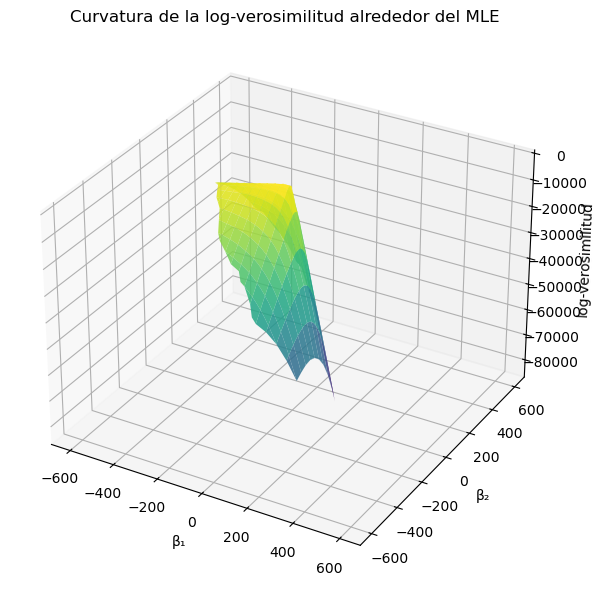

In [10]:
# Visualizar curvatura de log-verosimilitud en el plano (Œ≤1, Œ≤2)
grid = np.linspace(-600, 600, 70)
B1, B2 = np.meshgrid(grid, grid)
Z = np.zeros_like(B1)

beta0_fixed = beta_hat[0]
for i in range(B1.shape[0]):
    for j in range(B1.shape[1]):
        beta_try = np.array([beta0_fixed, B1[i, j], B2[i, j]])
        z = X_ext @ beta_try
        ll = np.sum(y * z - np.log(1 + np.exp(z)))
        Z[i, j] = ll

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(B1, B2, Z, cmap='viridis', alpha=0.85)
ax.set_xlabel('Œ≤‚ÇÅ')
ax.set_ylabel('Œ≤‚ÇÇ')
ax.set_zlabel('log-verosimilitud')
ax.set_title('Curvatura de la log-verosimilitud alrededor del MLE')
plt.tight_layout()
plt.show()


### üìå Interpretaci√≥n

- La matriz de informaci√≥n de Fisher cuantifica la **curvatura local** de la log-verosimilitud en el √≥ptimo.
- Una mayor curvatura implica **mayor precisi√≥n** en la estimaci√≥n (menor varianza asint√≥tica).
- La gr√°fica 3D muestra la superficie de log-verosimilitud sobre el plano (Œ≤‚ÇÅ, Œ≤‚ÇÇ), con Œ≤‚ÇÄ fijo.
- En direcciones m√°s ‚Äúpicudas‚Äù, el modelo tiene m√°s certeza sobre los par√°metros; en direcciones planas, hay m√°s incertidumbre.


# Estimar la curvatura = ¬ø?